# Text Analysis of Succession - 4x08 "America Decides" - Post Episode Discussion from Reddit

In [1]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 2.8 MB/s eta 0:00:00


In [2]:
!pip install --upgrade praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Connection to Reddit

In [5]:
#import pickle

# Open the reddit variable with app values as a pickle file
#with open('reddit.pickle', 'rb') as f:
#    reddit = pickle.load(f)

In [6]:
import re

# example Reddit post URL
url = 'https://www.reddit.com/r/SuccessionTV/comments/13huc1n/succession_4x08_america_decides_post_episode/'

# extract the subreddit name and post ID from the URL
match = re.search(r'/r/(\w+)/comments/(\w+)/', url)
subreddit_name = match.group(1)
post_id = match.group(2)

print(subreddit_name, post_id)

SuccessionTV 13huc1n


## Sentiment Analysis

We'll be doing an analysis of 499 posts.

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [8]:
import warnings
warnings.filterwarnings("ignore", message=".*Using an asynchronous PRAW instance.*")


In [9]:
# get the subreddit and post using PRAW
subreddit = reddit.subreddit(subreddit_name)
post = reddit.submission(id=post_id)

# analyze the sentiment of each comment in the post
for comment in post.comments.list():
    if isinstance(comment, praw.models.MoreComments):
        continue
    sentiment = sia.polarity_scores(comment.body)
    print(f"Comment: {comment.body}")
    print(f"Sentiment: {sentiment}\n")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: That was the longest conversation Greg and Shiv had.
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Comment: That entire sequence looking at Ken through the glass was *amazing*
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Comment: Connor's concession speech was....something
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Comment: “Maybe the poison drips through.” 

-The Succession thesis statement
Sentiment: {'neg': 0.285, 'neu': 0.569, 'pos': 0.146, 'compound': -0.4019}

Comment: This episode was STRESSFUL and then:

“Connor was running for president?” 


“I happen to be a Billionaire”

That scene was hilarious
Sentiment: {'neg': 0.163, 'neu': 0.728, 'pos': 0.109, 'compound': -0.3254}

Comment: Roman working out his Chicken vs steak trauma via the American presidency is so peak Succession
Sentiment: {'neg': 0.148, 'neu': 0.742, 'pos': 0.11, 'compound': -0.1832}

Comment: “I don’t think of things such as that” 
- a new 

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# analyze the sentiment of each comment in the post
compound_scores = []
for comment in post.comments.list():
    if isinstance(comment, praw.models.MoreComments):
        continue
    sentiment = sia.polarity_scores(comment.body)
    compound_scores.append(sentiment['compound'])

# calculate the average compound score and print the results
average_score = sum(compound_scores) / len(compound_scores)
num_comments = len(compound_scores)
print(f"Analyzed {num_comments} comments with an average compound score of {average_score:.2f}")


Analyzed 500 comments with an average compound score of 0.01


A compound score of 0.01 is positive but very close to neutral, which means that the analyzed comments may contain a mix of positive and negative sentiment, but overall the sentiment leans slightly towards the positive side. 


## Wordcloud

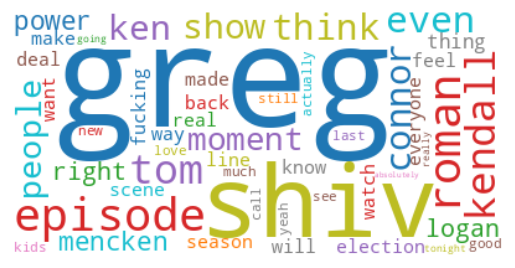

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# extract the comments from the post and remove any MoreComments objects
comments = [comment.body for comment in post.comments.list() if not isinstance(comment, praw.models.MoreComments)]

# add custom stopwords
stop_words = set(STOPWORDS)
stop_words.update(["s", "t", "one", "get", "would", "like", "re" "ve", "m"])

# remove stopwords and convert text to lowercase
clean_text = " ".join([word.lower() for word in " ".join(comments).split() if word.lower() not in stop_words])

# generate the wordcloud
color_map = plt.get_cmap('tab10') # create a custom color map
wordcloud = WordCloud(stopwords=stop_words, max_words=50, background_color="white", colormap=color_map).generate(clean_text)

# display the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## LSA

In [12]:
import numpy as np
import pandas as pd

# create a pandas DataFrame with a single column called "comments"
df = pd.DataFrame(comments, columns=["comments"])

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# stopwords in english
stop_words_en = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
def clean_text(headline):
  le = WordNetLemmatizer()
  word_tokens = word_tokenize(headline)
  tokens = [le.lemmatize(x) for x in word_tokens 
            if x not in stop_words_en and len(x) > 3]
  clean_text = " ".join(tokens)
  return clean_text

In [15]:
df['clean_comments'] = df['comments'].apply(clean_text)
df['clean_comments']

# aplicamos stemming
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
df['stemmed_comments'] = [stemmer.stem(word) for word in df['clean_comments']]
df['stemmed_comments']

0                    that longest conversation greg shiv
1                that entire sequence looking glass amaz
2                   connor concession speech .... someth
3      maybe poison drip through. -the succession the...
4      this episode stressful connor running presiden...
                             ...                        
495    doubt issue found night immediately told kenda...
496                           didn learn night much flak
497                                greg least undercross
498                             this might take best lin
499    smash fucking face talking shiv that line para...
Name: stemmed_comments, Length: 500, dtype: object

In [16]:
df

,comments,clean_comments,stemmed_comments
0,That was the longest conversation Greg and Shi...,That longest conversation Greg Shiv,that longest conversation greg shiv
1,That entire sequence looking at Ken through th...,That entire sequence looking glass amazing,that entire sequence looking glass amaz
2,Connor's concession speech was....something,Connor concession speech .... something,connor concession speech .... someth
3,“Maybe the poison drips through.” \n\n-The Suc...,Maybe poison drip through. -The Succession the...,maybe poison drip through. -the succession the...
4,This episode was STRESSFUL and then:\n\n“Conno...,This episode STRESSFUL Connor running presiden...,this episode stressful connor running presiden...
...,...,...,...
495,I doubt that will be an issue at all. He found...,doubt issue found night immediately told Kenda...,doubt issue found night immediately told kenda...
496,"Didn’t he learn about it the night before, so ...",Didn learn night much flak,didn learn night much flak
497,> Greg?\n\nAt least it wasn't undercrossed,Greg least undercrossed,greg least undercross
498,This might have to take over as Tom’s best line,This might take best line,this might take best lin


In [17]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

svd_model = TruncatedSVD(n_components = 5, random_state = 42)
tfvec = TfidfVectorizer()
tf_p = tfvec.fit_transform(df.stemmed_comments)
svd_model.fit(tf_p)
terms = tfvec.get_feature_names_out()

for i, component in enumerate(svd_model.components_):
  terminos = zip(terms, component)
  top_terminos = sorted(terminos, key = lambda x: x[1], reverse = True)[:7]
  lista_temas = list(dict(top_terminos).keys())
  print("Topic "+str(i+1)+": ", lista_temas)

Topic 1:  ['greg', 'shiv', 'roman', 'like', 'kendall', 'think', 'episode']
Topic 2:  ['greg', 'lemon', 'matsson', 'must', 'drink', 'what', 'mugged']
Topic 3:  ['think', 'like', 'yeah', 'win', 'fine', 'information', 'show']
Topic 4:  ['episod', 'roman', 'watch', 'lemon', 'fucking', 'fuckin', 'touchscreen']
Topic 5:  ['shiv', 'kendall', 'know', 'logan', 'roman', 'deal', 'kid']
